In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your customer data into a DataFrame
# Replace 'your_data.csv' with the actual file path or URL of your dataset
data = pd.read_csv('Mall_Customers.csv',)

In [ ]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
# Select relevant features for segmentation
# This may include demographics, purchase history, website activity, etc.
selected_features = data[['Age', 'Spending Score (1-100)']]

In [ ]:
# Standardize the features to have zero mean and unit variance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

In [ ]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clustmers=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)


In [ ]:
wcss

[399.9999999999999,
 189.38749033992428,
 124.32628617921532,
 89.76521676586151,
 71.09364141459412,
 53.128438356294026,
 45.903798612012075,
 39.39545917716782,
 33.86021150658476,
 28.80084946927365]

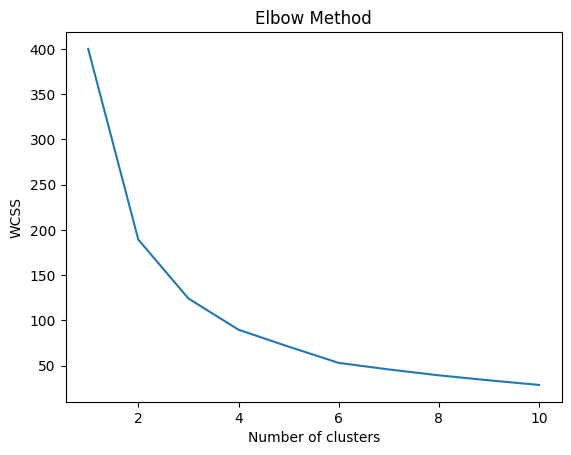

In [ ]:
# Plot the elbow graph to find the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # WCSS stands for "within-cluster sum of squares"
plt.show()

In [ ]:
# Based on the elbow graph, choose the optimal number of clusters
optimal_clusters = 3  # Update this based on your analysis

In [ ]:
# Apply KMeans clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['Segment'] = kmeans.fit_predict(scaled_features)

In [ ]:
data["Segment"].unique()

array([2, 0, 1], dtype=int32)

In [ ]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Segment
0,1,Male,19,15,39,2
1,2,Male,21,15,81,0
2,3,Female,20,16,6,2
3,4,Female,23,16,77,0
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,2
197,198,Male,32,126,74,0
198,199,Male,32,137,18,2


In [ ]:
data[["Age", "Spending Score (1-100)"]]

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [ ]:
t1 = data[data["Segment"]==0]
t2 = data[data["Segment"]==1]
t3 = data[data["Segment"]==2]

In [ ]:
t

,Age,Spending Score (1-100)
1,21,81
3,23,77
5,22,76
7,23,94
9,30,72
...,...,...
191,32,69
193,38,91
195,35,79
197,32,74


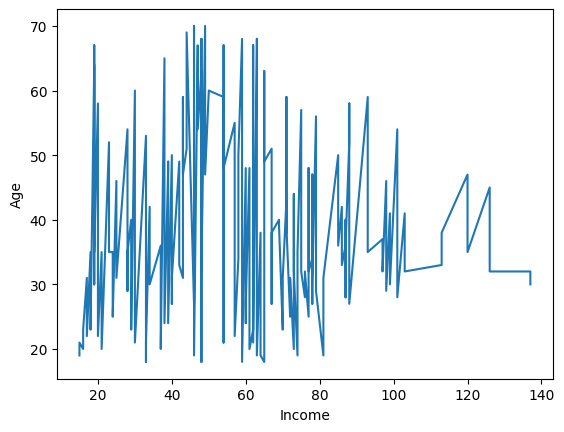

In [ ]:
plt.xlabel('Income')
plt.ylabel('Age')
plt.plot(data["Annual Income (k$)"], data["Age"])

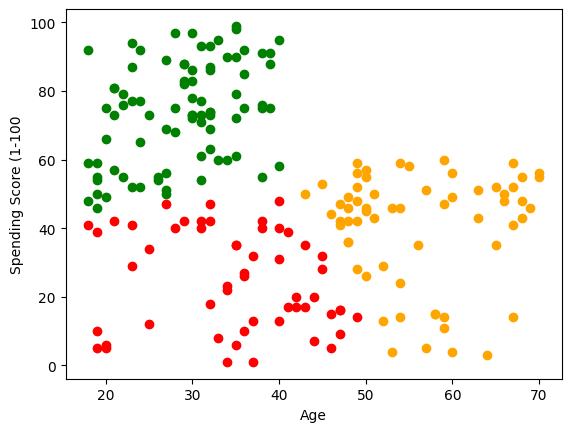

In [ ]:
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100')
plt.scatter(t1["Age"], t1["Spending Score (1-100)"], color="green")
plt.scatter(t2["Age"], t2["Spending Score (1-100)"], color="orange")
plt.scatter(t3["Age"], t3["Spending Score (1-100)"], color="red")

In [ ]:
# Analyze and interpret the segments
segment_means = data.groupby('Segment').mean()
print(segment_means)

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Segment                                                                   
0        105.107143  28.714286           62.142857               73.797619
1         85.467742  56.080645           54.354839               40.306452
2        110.592593  34.833333           65.222222               24.851852


<ipython-input-18-af004cd36c98>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  segment_means = data.groupby('Segment').mean()
